In [47]:
import pandas as pd
from matplotlib import pyplot as plt
import datetime
import json
from matplotlib import dates as plt_dates

# EDA

Let's begin by summarising and understanding the data we are analysing. All the data we have is located in the `donnees` folder. Inside, we find the following:

- `images`: A folder containing pictures found on the Internet, purporting to be real pictures.
- `articles_web.txt`: Articles.
- `facebook_posts.json`: Facebook posts.
- `metadata_comptes.json`: Informations about X (Twitter) accounts.
- `relations_network.csv`: Interactions between X (Twitter) accounts.
- `textes_analyse_sentiment.txt`: A collection of texts, apparently reactions to articles or tweets.
- `tweets_dataset.csv`: A CSV listing tweets.

We will now explore, one by one, some of those files.

## articles_web.txt

Looking at the file, it is formatted in a specific way. This will allow us later to load it into a data structure that’s more convenient to work with.

```
========================================
ARTICLE {n} - Source: {website}
Date: {date_w3c}
Auteur: {author}
========================================

{title}

{content}
```

## facebook_posts.json

In [48]:
fb_posts_df = pd.read_json('donnees/facebook_posts.json', convert_dates=['post_date'])
fb_posts_df.sort_values('post_date', inplace=True) # We sort by date
fb_posts_df.describe()

,post_date,likes,shares,comments
count,41,41.000000,41.000000,41.000000
mean,2024-01-17 22:32:03.926829312,2831.317073,1509.341463,725.414634
min,2024-01-15 09:30:12,234.000000,67.000000,45.000000
25%,2024-01-16 15:45:29,678.000000,234.000000,234.000000
50%,2024-01-18 09:00:15,2456.000000,1234.000000,567.000000
75%,2024-01-18 22:15:07,4523.000000,2567.000000,1123.000000
max,2024-01-19 22:00:08,8765.000000,5432.000000,2345.000000
std,NaN,2205.581969,1357.147848,613.381609


In [49]:
fb_posts_df.iloc[0]

page_name                       Collectif Anti-Éoliennes Loire
post_date                                  2024-01-15 09:30:12
content      RASSEMBLEMENT URGENT ! Les autorités veulent n...
likes                                                     2340
shares                                                     876
comments                                                   234
Name: 0, dtype: object

In [50]:
fb_posts_df.iloc[0]['content']

"RASSEMBLEMENT URGENT ! Les autorités veulent nous imposer 150 monstres d'acier qui vont détruire notre patrimoine maritime. Rejoignez-nous samedi 10h place de la Mairie. Ensemble, nous sommes plus forts ! ✊🌊 #StopEoliennes #Loire"

### tweets_dataset.csv

In [51]:
x_posts_df = pd.read_csv('donnees/tweets_dataset.csv', parse_dates=['date'])
x_posts_df.head(3)

,username,text,date,retweets,likes,hashtags,mentions
0,Dr_Laurent_CNRS,Nos études sur l'impact des éoliennes offshore...,2024-01-15 09:23:12,45,187,#EolienOffshore;#Recherche,NaN
1,EcoDefense44,URGENT ! Les éoliennes vont détruire notre lit...,2024-01-15 14:32:45,12,34,#NonAuxEoliennes;#SauverLaLoire,NaN
2,Sophie_Journaliste,Interview du préfet maritime sur le projet éol...,2024-01-15 16:47:33,23,78,#Journalisme;#Loire,NaN


In [52]:
# All the posts are in 2024
x_posts_df.describe()

,date,retweets,likes
count,95,95.000000,95.000000
mean,2024-01-18 15:10:32.905262848,98.968421,292.200000
min,2024-01-15 09:23:12,3.000000,7.000000
25%,2024-01-17 03:00:14.500000,34.000000,96.500000
50%,2024-01-18 16:12:31,76.000000,234.000000
75%,2024-01-19 23:04:16,167.000000,495.000000
max,2024-01-21 13:26:37,245.000000,723.000000
std,NaN,72.813731,216.246343


### metadata_comptes.json

In [53]:
with open('donnees/metadata_comptes.json') as f:
    data = json.load(f)

x_accounts_df = pd.DataFrame(data['twitter_accounts'])
x_accounts_df['created_date'] = pd.to_datetime(x_accounts_df['created_date'])
x_accounts_df.head(3)

,username,created_date,followers_count,following_count,total_tweets,bio,location,profile_image_url,website
0,Dr_Laurent_CNRS,2011-03-15,4523,1876,8934,Biologiste marin | CNRS La Rochelle | Recherch...,"La Rochelle, France",https://example.com/profiles/dr_laurent.jpg,https://www.cnrs.fr/fr/personne/laurent-bernard
1,AlerteVerite2024,2023-12-05,3421,4567,456,Révéler la vérité cachée | Contre les lobbies ...,France,https://example.com/profiles/alerteverite.jpg,https://verite-citoyenne-info.net
2,Sophie_Journaliste,2014-06-20,18934,2345,12456,Journaliste d'investigation @OuestFrance | Env...,"Nantes, France",https://example.com/profiles/sophie_martin.jpg,https://www.ouest-france.fr/auteur/sophie-martin


### Visualisations

Text(0.5, 0, 'X Posts')

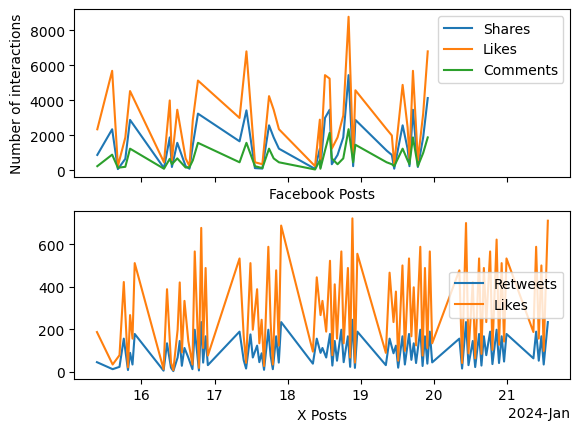

In [54]:
fig, (ax_fb, ax_x) = plt.subplots(2, 1, sharex=True)
ax_fb.plot(fb_posts_df['post_date'], fb_posts_df['shares'], label="Shares")
ax_fb.plot(fb_posts_df['post_date'], fb_posts_df['likes'], label="Likes")
ax_fb.plot(fb_posts_df['post_date'], fb_posts_df['comments'], label="Comments")
ax_fb.set_xlabel("Facebook Posts")
ax_fb.set_ylabel("Number of interactions")
ax_fb.legend()
ax_fb.xaxis.set_major_formatter(plt_dates.ConciseDateFormatter(ax_fb.xaxis.get_major_locator()))

ax_x.plot(x_posts_df['date'], x_posts_df['retweets'], label="Retweets")
ax_x.plot(x_posts_df['date'], x_posts_df['likes'], label="Likes")
ax_x.legend()
ax_x.set_xlabel("X Posts")

We observe an almost linear relationship between shares, likes, and comments counts, which seems highly indicative of CIB.

In [60]:
fb_n_posts = fb_posts_df.set_index('post_date').groupby(pd.Grouper(freq='D')).count()
x_n_accounts = x_accounts_df[x_accounts_df['created_date'] > '2024-01-01'].set_index('created_date').groupby(pd.Grouper(freq='D')).count()
x_n_posts_df = x_posts_df.set_index('date').groupby(pd.Grouper(freq='D')).count()

#.groupby(by='post_date').count()

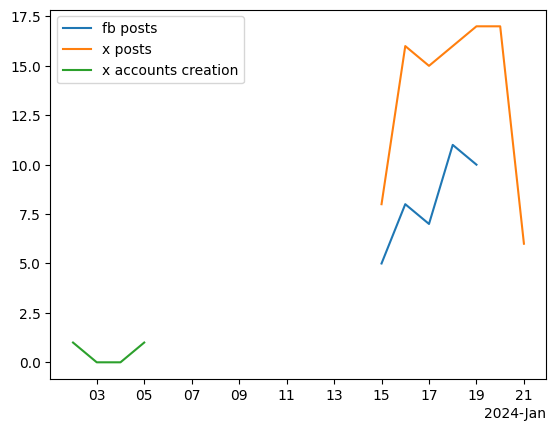

In [64]:
fig, ax = plt.subplots()
ax.plot(fb_n_posts.index, fb_n_posts['content'])
ax.plot(x_n_posts_df.index, x_n_posts_df['likes'])
ax.plot(x_n_accounts.index, x_n_accounts['bio'])
ax.xaxis.set_major_formatter(plt_dates.ConciseDateFormatter(ax.xaxis.get_major_locator()))
ax.legend(['fb posts', 'x posts', 'x accounts creation'])

Vis suggests correlation between X posts and facebook posts but data is too sparse to come to definitive conclusions.

## By 15 minutes

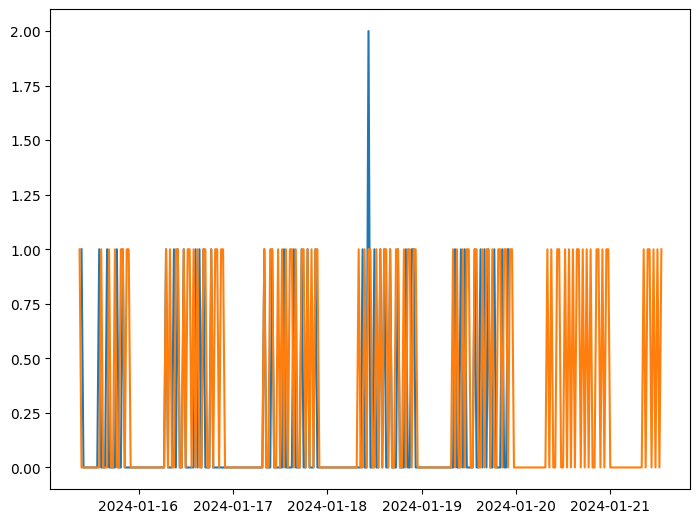

In [ ]:
fb_n_posts_df = fb_posts_df.set_index('post_date').groupby(pd.Grouper(freq='30min')).count()

x_n_posts_df = x_posts_df.set_index('date').groupby(pd.Grouper(freq='30min')).count()

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1]) 
ax.plot(fb_n_posts_df.index, fb_n_posts_df['content'])
ax.plot(x_n_posts_df.index, x_n_posts_df['likes'])

In [65]:
x_posts_df.describe()

,date,retweets,likes
count,95,95.000000,95.000000
mean,2024-01-18 15:10:32.905262848,98.968421,292.200000
min,2024-01-15 09:23:12,3.000000,7.000000
25%,2024-01-17 03:00:14.500000,34.000000,96.500000
50%,2024-01-18 16:12:31,76.000000,234.000000
75%,2024-01-19 23:04:16,167.000000,495.000000
max,2024-01-21 13:26:37,245.000000,723.000000
std,NaN,72.813731,216.246343


In [67]:
fb_posts_df.describe()

,post_date,likes,shares,comments
count,41,41.000000,41.000000,41.000000
mean,2024-01-17 22:32:03.926829312,2831.317073,1509.341463,725.414634
min,2024-01-15 09:30:12,234.000000,67.000000,45.000000
25%,2024-01-16 15:45:29,678.000000,234.000000,234.000000
50%,2024-01-18 09:00:15,2456.000000,1234.000000,567.000000
75%,2024-01-18 22:15:07,4523.000000,2567.000000,1123.000000
max,2024-01-19 22:00:08,8765.000000,5432.000000,2345.000000
std,NaN,2205.581969,1357.147848,613.381609


No correlation between the two.

# Questions

1. Quelle plateforme présente le volume d'activité le plus important ?

Twitter.

2. Identifiez-vous des pics d'activité synchronisés entre plateformes ? (indicateur de campagne
coordonnée)

Pas vraiment, en tout cas pas dans une échelle de 15-30 minutes. Mais le dataset est trop limité pour qu’on comprenne.

3. Quel est le ratio engagement/publication moyen par plateforme ?

En moyenne, 2831 likes par post facebook et 98 retweets par tweet Twitter.

## 2.A Détection de Contenus synthétiques textuels

In [73]:
with open('donnees/textes_analyse_sentiment.txt', 'r') as f:
    lines = f.readlines()
    texts = [lines[i*3+1] for i in range(len(lines) // 3)]
texts

["Les éoliennes offshore sont une catastrophe écologique sans précédent. Les lobbies verts mentent délibérément au peuple français. Il faut stopper ce projet immédiatement avant qu'il ne soit trop tard. Nos enfants nous maudiront pour notre passivité face à cette destruction programmée.\n",
 "Le projet de parc éolien offshore comprend 150 turbines d'une puissance unitaire de 8 MW, soit une capacité totale de 1200 MW. La zone d'implantation se situe à 12 km des côtes, sur une superficie de 85 km². La durée d'exploitation prévue est de 30 ans.\n",
 "C'est une excellente nouvelle pour la transition énergétique de notre région. Ce projet créera 800 emplois locaux et permettra de réduire significativement nos émissions de CO2. Félicitations aux équipes qui ont travaillé sur ce dossier pendant 3 ans.\n",
 "ALERTE CORRUPTION ! Des documents confidentiels révèlent que des ministres ont touché des pots-de-vin de plusieurs millions d'euros. Les médias complices refusent de publier ces informatio

| ID Texte | Score IA | Texte |
|----------|----------|-------|
| TEXTE_001 | 0.65 | Les éoliennes offshore sont une catastrophe écologique sans précédent. Les lobbies verts mentent délibérément au peuple français. Il faut stopper ce projet immédiatement avant qu'il ne soit trop tard. Nos enfants nous maudiront pour notre passivité face à cette destruction programmée. |
| TEXTE_002 | 0.85 | Le projet de parc éolien offshore comprend 150 turbines d'une puissance unitaire de 8 MW, soit une capacité totale de 1200 MW. La zone d'implantation se situe à 12 km des côtes, sur une superficie de 85 km². La durée d'exploitation prévue est de 30 ans. |
| TEXTE_003 | 0.60 | C'est une excellente nouvelle pour la transition énergétique de notre région. Ce projet créera 800 emplois locaux et permettra de réduire significativement nos émissions de CO2. Félicitations aux équipes qui ont travaillé sur ce dossier pendant 3 ans. |
| TEXTE_004 | 0.70 | ALERTE CORRUPTION ! Des documents confidentiels révèlent que des ministres ont touché des pots-de-vin de plusieurs millions d'euros. Les médias complices refusent de publier ces informations explosives. Partagez massivement avant la censure totale ! |
| TEXTE_005 | 0.85 | L'enquête publique s'est déroulée du 1er juin au 31 juillet 2023. 3452 contributions ont été enregistrées. Le commissaire enquêteur a rendu un avis favorable assorti de 12 réserves, toutes prises en compte dans la version finale du projet. |
| TEXTE_006 | 0.65 | Les dauphins meurent par milliers à cause des éoliennes. Les scientifiques corrompus cachent la vérité. Seuls les citoyens éveillés peuvent encore sauver notre océan de ce massacre organisé par les élites mondialistes qui veulent détruire notre environnement. |
| TEXTE_007 | 0.80 | Après deux ans de négociations, nous avons obtenu des garanties solides pour préserver les zones de pêche essentielles. Le fonds de compensation permettra d'accompagner les pêcheurs impactés. Un compromis équilibré qui respecte les intérêts de tous. |
| TEXTE_008 | 0.65 | Ils veulent nous imposer leur dictature écologique ! Macron et ses copains détruisent notre pays pour enrichir les multinationales allemandes. Le peuple doit se soulever contre cette trahison nationale. Résistance maintenant ou soumission définitive ! |
| TEXTE_009 | 0.85 | Les études d'impact acoustique ont été menées par le bureau d'études AKUSTIK sur 36 mois. Les relevés ont été effectués sur 15 points de mesure fixes et 30 campagnes mobiles. Les données brutes sont disponibles dans l'annexe 7 du dossier technique. |
| TEXTE_010 | 0.60 | Enfin un projet ambitieux pour l'avenir énergétique de notre territoire ! L'éolien offshore est mature technologiquement et économiquement viable. Bravo pour ce choix courageux qui place notre région en pointe de la transition écologique. |
| TEXTE_011 | 0.65 | ILS CENSURENT LA VERITE ! Tous les médias mainstream sont achetés par le lobby éolien. Seule l'information alternative révèle ce que les élites veulent cacher. Réveillez-vous avant qu'il ne soit trop tard ! La dictature s'installe sous nos yeux ! |
| TEXTE_012 | 0.85 | Le coût total du projet s'élève à 2,4 milliards d'euros, financés à hauteur de 85% par le consortium Éolmer (EDF Renouvelables 40%, Enbridge 35%, wpd offshore 25%) et 15% par la Caisse des Dépôts et Consignations. |
| TEXTE_013 | 0.60 | Je suis fier que notre commune participe à cet effort collectif pour le climat. Les nouvelles générations nous remercieront d'avoir eu le courage de prendre des décisions responsables malgré les résistances et les oppositions de court terme. |
| TEXTE_014 | 0.65 | COMPLOT MONDIAL ! Ce projet fait partie d'un agenda globaliste pour asservir les peuples. Les éoliennes servent à contrôler les populations par les ondes électromagnétiques. Documentez-vous sur la vérité cachée ! Ne croyez plus les mensonges officiels ! |
| TEXTE_015 | 0.85 | L'impact visuel a été évalué par simulation 3D depuis 25 points de vue côtiers. À 12 km de distance, la hauteur apparente des éoliennes sera de 0,8 à 1,2 degrés selon les conditions atmosphériques et la position de l'observateur sur le littoral. |
| TEXTE_016 | 0.65 | Les politiciens corrompus vendent notre patrimoine aux étrangers ! Pendant que le peuple souffre, les élites s'enrichissent honteusement. Il est temps de faire tomber ce système pourri jusqu'à la moelle ! La révolution citoyenne approche ! |
| TEXTE_017 | 0.85 | Les mesures de protection de la biodiversité prévues sont exemplaires : système anti-collision pour les navires, arrêt des travaux pendant les périodes de reproduction, suivi scientifique sur 30 ans. Un modèle de responsabilité environnementale à reproduire. |
| TEXTE_018 | 0.85 | La phase de construction débutera en septembre 2025 pour une durée estimée de 36 mois. La mise en service progressive s'échelonnera de janvier 2028 à juin 2028. La pleine capacité sera atteinte en juillet 2028 selon le planning prévisionnel. |
| TEXTE_019 | 0.65 | GENOCIDE ECOLOGIQUE ! Les autorités organisent sciemment l'extermination de la faune marine. Ce crime contre la nature doit être jugé au tribunal international. Mobilisation générale pour stopper ces assassins en col blanc qui détruisent notre océan ! |
| TEXTE_020 | 0.85 | Le raccordement au réseau électrique national s'effectuera via deux câbles sous-marins de 225 kV aboutissant au poste électrique de Cordemais. La capacité d'injection sur le réseau a été validée par RTE dans son schéma régional de raccordement des énergies renouvelables. |
| TEXTE_021 | 0.60 | Ce projet représente une avancée majeure pour notre autonomie énergétique. Les retombées économiques locales sont garanties par des clauses contractuelles strictes. Une belle démonstration de ce qu'un territoire peut accomplir quand volonté politique et expertise se conjuguent. |
| TEXTE_022 | 0.65 | TRAHISON NATIONALE ! Le gouvernement brade notre souveraineté aux multinationales étrangères. Pendant ce temps les Français paient des factures toujours plus élevées. Quand le peuple va-t-il enfin ouvrir les yeux sur cette escroquerie monumentale ? |
| TEXTE_023 | 0.85 | L'étude d'impact sur l'avifaune migratrice a été réalisée par la LPO et le Museum National d'Histoire Naturelle entre mars 2021 et février 2023. 24 campagnes d'observation ont permis d'identifier 87 espèces dont 12 classées au titre de la directive Oiseaux. |
| TEXTE_024 | 0.65 | Les infrasons émis par les éoliennes rendent les gens malades ! Insomnies, vertiges, dépression... Les autorités sanitaires refusent de reconnaître le syndrome éolien parce qu'elles sont sous la coupe du lobby industriel. Combien de victimes avant qu'on réagisse ? |
| TEXTE_025 | 0.85 | La concertation publique a mobilisé plus de 2500 participants sur l'ensemble des réunions organisées dans les 15 communes concernées. Les comptes-rendus détaillés sont disponibles sur le site internet dédié et en consultation dans chaque mairie. |
| TEXTE_026 | 0.60 | Enfin une initiative qui démontre que développement économique et respect de l'environnement peuvent aller de pair. Les garanties apportées aux acteurs locaux sont solides. Notre territoire s'inscrit ainsi dans la modernité tout en préservant ses atouts. |
| TEXTE_027 | 0.65 | MANIPULATION DE MASSE ! Les soi-disant "experts" sont tous payés par les lobbies pour mentir au peuple. Les vraies études indépendantes prouvent la dangerosité de ces machines infernales. Mais la vérité dérange trop les puissants qui contrôlent tout ! |
| TEXTE_028 | 0.85 | Le programme de suivi environnemental post-construction prévoit des campagnes annuelles pendant 30 ans portant sur l'ichtyofaune, les mammifères marins, l'avifaune et les habitats benthiques. Budget total alloué : 45 millions d'euros sur la durée d'exploitation. |
| TEXTE_029 | 0.65 | Nos plages vont être défigurées à jamais ! L'horizon magnifique que nous contemplons depuis des générations sera gâché par ces monstrueuses machines industrielles. Le tourisme va s'effondrer et notre économie locale avec. C'est une catastrophe annoncée ! |
| TEXTE_030 | 0.85 | Les retours d'expérience des parcs éoliens offshore existants en Europe du Nord sont très positifs. Les impacts sur la pêche sont limités et compensés. La biodiversité marine s'adapte voire bénéficie des zones d'exclusion qui créent des effets réserve. |
| TEXTE_031 | 0.85 | Le tarif de rachat de l'électricité produite a été fixé à 44 euros le MWh pour les 20 premières années d'exploitation, dans le cadre du mécanisme de Contract for Difference. Ce prix garantit la rentabilité du projet tout en restant compétitif par rapport aux autres sources d'énergie. |
| TEXTE_032 | 0.65 | SCANDALE : Les factures d'électricité vont exploser à cause de ce projet ruineux ! On nous impose une énergie intermittente et hors de prix pendant que le nucléaire français, fiable et peu cher, est abandonné. C'est du sabotage économique organisé ! |
| TEXTE_033 | 0.85 | Les études géotechniques ont identifié des fonds marins majoritairement sableux avec présence localisée de substrat rocheux. La profondeur moyenne de la zone est de 22 mètres. Les fondations de type monopieu ont été privilégiées après analyse comparative des différentes options techniques. |
| TEXTE_034 | 0.65 | Les éoliennes tuent les oiseaux par millions ! Les pales géantes broient tout ce qui passe. Les associations de protection de la nature sont muselées par les subventions qu'elles reçoivent des industriels. La vérité est étouffée mais nous continuerons à la crier ! |
| TEXTE_035 | 0.85 | Ce projet s'inscrit dans la Programmation Pluriannuelle de l'Énergie qui fixe un objectif de 40% d'énergies renouvelables dans le mix électrique d'ici 2030. Il contribuera à hauteur de 2,3% à cet objectif national tout en créant une filière industrielle régionale pérenne. |
| TEXTE_036 | 0.60 | Bravo aux porteurs de projet qui ont su écouter et intégrer les préoccupations des acteurs locaux. Le dialogue patient et constructif a permis d'aboutir à un projet équilibré qui respecte à la fois les impératifs climatiques et les réalités du territoire. Un exemple à suivre. |
| TEXTE_037 | 0.65 | Les lobbies de l'éolien ont infiltré tous les niveaux de l'État ! Ministres, préfets, élus locaux... tous corrompus ou sous influence. Seule la mobilisation citoyenne massive peut encore inverser cette dérive totalitaire. Résistons avant qu'il ne soit définitivement trop tard ! |
| TEXTE_038 | 0.85 | L'analyse du cycle de vie complet du parc éolien a été réalisée selon la norme ISO 14040. Le bilan carbone prévisionnel montre que les émissions liées à la construction et à l'exploitation seront compensées après 18 mois de production. Sur 30 ans, l'évitement d'émissions est estimé à 13,5 millions de tonnes de CO2. |
| TEXTE_039 | 0.65 | Les ondes électromagnétiques des câbles sous-marins perturbent gravement les champs magnétiques naturels. Les poissons et cétacés qui utilisent le magnétisme pour se repérer sont complètement désorientés. C'est une catastrophe écologique que les autorités minimisent volontairement ! |
| TEXTE_040 | 0.85 | L'impact socio-économique a été évalué par un cabinet indépendant : 800 emplois directs pendant la construction, 150 emplois permanents pour l'exploitation et la maintenance, retombées fiscales annuelles estimées à 8 millions d'euros pour les collectivités locales. |
| TEXTE_041 | 0.60 | Quelle fierté de voir notre région pionnière dans la transition énergétique ! Ce projet montre qu'il est possible de concilier ambition écologique et développement économique. Les générations futures se souviendront de ceux qui ont eu le courage d'agir plutôt que de subir. |
| TEXTE_042 | 0.65 | URGENCE ABSOLUE ! Un rapport scientifique indépendant révèle que 87% des dauphins vont mourir à cause de ce projet. Les médias aux ordres refusent de le publier. Partagez cette information capitale avant qu'elle ne soit censurée par les autorités complices ! |
| TEXTE_043 | 0.85 | Le dispositif de surveillance maritime pendant les travaux comprendra 3 navires dédiés, un système radar 360°, et des observateurs mammifères marins embarqués selon le protocole MMOP. Toute détection de cétacés dans un rayon de 500m entraînera l'arrêt immédiat des opérations bruyantes. |
| TEXTE_044 | 0.65 | Nos pêcheurs sont trahis ! Après nous avoir promis de préserver nos zones de pêche, ils réduisent notre espace de 40%. Les indemnisations proposées sont dérisoires face à la perte de notre outil de travail. C'est la mort programmée de la pêche artisanale française ! |
| TEXTE_045 | 0.85 | Les partenariats noués avec les laboratoires de recherche maritime (Ifremer, CNRS, universités) garantissent un suivi scientifique rigoureux et indépendant. Les données collectées contribueront à améliorer les connaissances sur les interactions entre énergies marines et écosystèmes. |
| TEXTE_046 | 0.85 | L'installation des éoliennes nécessitera l'utilisation de techniques de battage de pieux générant des niveaux sonores importants. Pour limiter l'impact sur la faune marine, des rideaux de bulles et des systèmes Hydro Sound Damper seront déployés, réduisant les émissions acoustiques de 15 à 20 décibels. |
| TEXTE_047 | 0.60 | Ce projet est une magnifique opportunité pour notre jeunesse. Les formations créées dans les métiers de la mer et des énergies renouvelables offriront des perspectives d'avenir à nos enfants. Investir dans ce projet, c'est investir dans l'avenir de notre territoire. |
| TEXTE_048 | 0.65 | Les élites mondialistes utilisent le prétexte écologique pour imposer leur Nouvel Ordre Mondial ! Ces éoliennes ne sont que des symboles de notre asservissement. Le grand remplacement énergétique n'est que la première étape d'un plan totalitaire global ! |
| TEXTE_049 | 0.85 | La cartographie des habitats marins a identifié la présence de bancs de maërl (algues calcaires) sur 3% de la zone initialement envisagée. Ces zones ont été exclues du périmètre final d'implantation afin de préserver ces habitats fragiles reconnus d'intérêt patrimonial. |
| TEXTE_050 | 0.85 | Le démantèlement du parc en fin de vie (après 30 ans d'exploitation) est intégralement provisionné dans le modèle économique. Les fondations seront retirées sur une profondeur minimale de 1 mètre sous le fond marin. Un taux de recyclage de 85% des matériaux est garanti contractuellement. |
| TEXTE_051 | 0.60 | Enfin notre territoire prend le virage de la modernité énergétique ! Les opposants passéistes refusent de voir que le monde change. Heureusement que des élus courageux osent prendre des décisions d'avenir malgré les résistances. L'histoire leur donnera raison. |
| TEXTE_052 | 0.65 | MENSONGE D'ETAT ! Le coût réel de ce projet est 5 fois supérieur aux annonces officielles. C'est le contribuable français qui va payer cette gabegie pendant des décennies. Pendant ce temps les actionnaires étrangers empochent les profits. Scandale absolu ! |
| TEXTE_053 | 0.85 | La modélisation hydrodynamique réalisée avec le logiciel TELEMAC-3D montre que la présence des fondations modifiera localement les courants marins avec une réduction moyenne de vélocité de 3 à 7% dans la zone du parc. Ces modifications restent dans la variabilité naturelle du système. |
| TEXTE_054 | 0.65 | Les vibrations permanentes des éoliennes rendent la vie impossible dans un rayon de 10 kilomètres ! Les témoignages de riverains d'autres parcs éoliens sont accablants : migraines, troubles du sommeil, stress chronique. Mais on nous impose quand même ces machines de torture ! |
| TEXTE_055 | 0.85 | Le plan de formation développé en partenariat avec les lycées maritimes et l'université de Nantes permettra de former 300 techniciens spécialisés sur 3 ans. Ces compétences seront transférables à d'autres projets d'énergies marines, créant ainsi une filière d'excellence régionale durable. |


In [74]:
# we apply the patch and install the dependencies of Binocular, and run it on the texts


## Exercice 2B

In [77]:
import pandas as pd
from d3lta.faissd3lta import *

df = pd.DataFrame(examples_dataset, columns=["text_language_detect"])
df.index = df.index.astype(str)

matches, df_clusters = semantic_faiss(
    df=df.rename(columns={"text_language_detect": "original"}),
    min_size_txt=10,
    embeddings_to_save='myembeddings',
    threshold_grapheme=0.693,
    threshold_language=0.715,
    threshold_semantic=0.85,
)

ModuleNotFoundError: No module named 'distutils'